# Introduction to Python

## Using the tdt Package

This primer walks through installing the tdt Python package, shows how to convert existing Matlab code to Python, and highlights some of the differences when working in Python.

## Installation

1. Make sure that you have [**Miniconda**](https://docs.conda.io/en/latest/miniconda.html) or [**Anaconda**](https://www.anaconda.com/distribution/) installed. You can choose the Python 3.7 64-bit version for your operating system (Linux, Windows, or OS X).
2. **Open a terminal** (on Windows, `cmd`, not Powershell) and type:
```
pip install tdt
```
4. **Done**!


## Converting Existing Matlab Code to Python

The tdt Python library for reading TDT data is one-to-one compatible with the Matlab library, however the function names and parameter names are different.

### Extracting Block Data

**TDTbin2mat** extracts block data into a Matlab structure.  
```
data = TDTbin2mat(BLOCK_PATH);
```
The Python equivalent is **read_block**.
```
from tdt import read_block
data = read_block(BLOCK_PATH)
```
**TDTbin2mat** and **read_block** share parameters, but the parameters have different names.

#### Parameter Name Translation Table

| Matlab | Python | Description |
|----------|----------|----------------------------------------------------------------------------------------------------------------------------------------|
| T1 | t1 | scalar, retrieve data starting at t1 (default = 0 for beginning of recording) |
| T2 | t2 | scalar, retrieve data ending at t2 (default = 0 for end of recording) |
| TYPE | evtype | array of strings, specifies what type of data stores to retrieve from the tank |
| SORTNAME | sortname | string, specify sort ID to use when extracting snippets<br>(default = 'TankSort') |
| RANGES | ranges | array of valid time range column vectors |
| NODATA | nodata | bool, only return timestamps, channels, and sort codes for snippets<br>(default = false) |
| STORE | store | string or list of strings, specify specific store(s) to extract |
| CHANNEL | channel | integer, choose a single channel to extract from stream or snippet events |
| BITWISE | bitwise | string, specify an epoc store or scalar store that contains a 32-bit integer.<br>Onsets/offsets from individual bits will be extracted |
| HEADERS | headers | var, set to 1 to return only the headers for this block, if you need to<br>make fast consecutive calls to read_block |
| COMBINE | combine | list, specify store(s) that were saved by the Strobed Data Storage gizmo<br> in Synapse. It will intelligently combine data into snippets. |

### Epoc Filtering

**TDTfilter** filters events around epoc events in Matlab.
```
data = TDTbin2mat(BLOCK_PATH);
data = TDTfilter(data, 'Tick', 'TIME', [-0.3, 0.8], 'VALUES', [5, 10, 15]);
```
The Python equivalent is **epoc_filter**.
```
from tdt import read_block, epoc_filter
data = read_block(BLOCK_PATH)
data = epoc_filter(data, 'Tick', t=[-0.3, 0.8], values=[5, 10, 15])
```
**TDTbin2mat** and **read_block** share parameters, but the parameters have different names.

#### Parameter Name Translation Table

| Matlab | Python | Description |
|-----------|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| VALUES | values | array of allowed epoc values |
| MODIFIERS | modifiers | array of allowed modifier values. For example, only allow time ranges<br>when allowed modifier occurred sometime during that event, <br>e.g. a correct animal response. |
| TIME | t | onset/offset pair, extracts events around epoc onsets only |
| TIMEREF | tref | boolean, set to True to use the epoc event onset as a time reference |
| KEEPDATA | keepdata | boolean, keep the original stream data array and add a field<br>called'filtered' that holds the data from each valid time range |

### Extracting SEV Data

**SEV2mat** extracts SEV files from a given directory into a Matlab structure. These files are created on the RS4 Data Streamer or by enabling the Discrete Files option in the Synapse Stream Data Storage gizmo. Each SEV file contains a header and the raw binary data from a single channel.
```
data = SEV2mat(BLOCK_PATH);
```
The Python equivalent is **read_sev**.
```
from tdt import read_sev
data = read_sev(BLOCK_PATH)
```
**SEV2mat** and **read_sev** share parameters, but the parameters have different names.

#### Parameter Name Translation Table
| Matlab | Python | Description |
|-----------|------------|-----------------------------------------------------------------------------------------------------------------------------|
| T1 | t1 | scalar, retrieve data starting at t1<br>(default = 0 for beginning of recording) |
| T2 | t2 | scalar, retrieve data ending at t2<br>(default = 0 for end of recording) |
| CHANNEL | channel | integer, returns the SEV data from specified channel only<br>(default = 0 for all channels) |
| RANGES | ranges | array of valid time range column vectors |
| JUSTNAMES | just_names | boolean, retrieve only the valid event names |
| EVENTNAME | event_name | string, specific event name to retrieve data from |
| VERBOSE | verbose | boolean, set to false to disable console output |
| FS | fs | float, sampling rate override. Useful for lower sampling rate<br>recordings that aren't correctly written into the SEV header. |


## Walkthrough
Let's look at some basic concepts for working with Python and the tdt library.  

***Python Tips!**

Use `print` in Python in place of `disp` in Matlab.  
`%` is a special command used mainly in Python notebooks  
`#` creates a single-line comment in Python  
Use `'''` to make a multi-line comment  

First we'll import the critical libraries.

In [1]:
# this is a single line comment

''' this is a comment
spanning multiple lines'''

# special call that tells notebook to show matlplotlib figures inline
%matplotlib inline

import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # fundamental package for scientific computing, handles arrays and maths

# import the primary functions from the tdt library only
from tdt import read_block, read_sev, epoc_filter, download_demo_data

***Python Tip!**

Use the **\_\_doc\_\_** function to get help on a function.

In [2]:
print(read_block.__doc__)

TDT tank data extraction.
    
    data = read_block(block_path), where block_path is a string, retrieves
    all data from specified block directory in struct format. This reads
    the binary tank data and requires no Windows-based software.

    data.epocs      contains all epoc store data (onsets, offsets, values)
    data.snips      contains all snippet store data (timestamps, channels,
                    and raw data)
    data.streams    contains all continuous data (sampling rate and raw
                    data)
    data.scalars    contains all scalar data (samples and timestamps)
    data.info       contains additional information about the block
    
    optional keyword arguments:
        t1          scalar, retrieve data starting at t1 (default = 0 for
                        beginning of recording)
        t2          scalar, retrieve data ending at t2 (default = 0 for end
                        of recording)
        sortname    string, specify sort ID to use when extrac

In [3]:
print(epoc_filter.__doc__)

TDT tank data filter. Extract data around epoc events.
    data = epoc_filter(data, epoc) where data is the output of read_block,
    epoc is the name of the epoc to filter on, and parameter value pairs
    define the filtering conditions.
    
    If no parameters are specified, then the time range of the epoc event
    is used as a time filter.
    
    Also creates data.filter, a string that describes the filter applied.
    Optional keyword arguments:
        values      specify array of allowed values
                      ex: tempdata = epoc_filter(data, 'Freq', values=[9000, 10000])
                        > retrieves data when Freq = 9000 or Freq = 10000
        modifiers   specify array of allowed modifier values.  For example,
                      only allow time ranges when allowed modifier occurred
                      sometime during that event, e.g. a correct animal response.
                      ex: tempdata = epoc_filter(data, 'Resp', modifiers=[1])
                 

In [4]:
print(read_sev.__doc__)

TDT sev file data extraction.
    
    data = read_sev(sev_dir), where sev_dir is a string, retrieves
    all sev data from specified directory in struct format. sev_dir can
    also be a single file. SEV files are generated by an RS4 Data Streamer,
    or by enabling the Discrete Files option in the Synapse Stream Data
    Storage gizmo, or by setting the Unique Channel Files option in 
    Stream_Store_MC or Stream_Store_MC2 macro to Yes in OpenEx.

    data    contains all continuous data (sampling rate and raw data)
    
    optional keyword arguments:
        t1          scalar, retrieve data starting at t1 (default = 0 for
                        beginning of recording)
        t2          scalar, retrieve data ending at t2 (default = 0 for end
                        of recording)
        channel     integer, returns the sev data from specified channel
                        only (default = 0 for all channels)
        ranges      array of valid time range column vectors
       

Download demo data from the TDT website

In [5]:
download_demo_data()

demo data ready


This example uses our [example data sets](https://www.tdt.com/files/examples/TDTExampleData.zip). To import your own data, replace BLOCK_PATH with the full path to your own data block.

In Synapse, you can find the block path in the database. Go to Menu > History. Find your block, then Right-Click > Copy path to clipboard.

In [6]:
BLOCK_PATH = 'data/Algernon-180308-130351'
data = read_block(BLOCK_PATH)

read from t=0s to t=61.23s


In [7]:
print(data)

epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])


**read_block** returns a structured object. It is a Python dictionary but also allows you to use the dot syntax like in Matlab, so you can access fields within the structure with either method. These two ways of looking at the block info field are equivalent:

In [8]:
data.info

tankpath:	'data'
blockname:	'Algernon-180308-130351'
start_date:	datetime.datetime(2018, 3, 8, 13, 3, 53)
utc_start_time:	'13:03:53'
stop_date:	datetime.datetime(2018, 3, 8, 13, 4, 55)
utc_stop_time:	'13:04:55'
duration:	datetime.timedelta(seconds=62)
stream_channel:	0
snip_channel:	0

In [9]:
data['info']

tankpath:	'data'
blockname:	'Algernon-180308-130351'
start_date:	datetime.datetime(2018, 3, 8, 13, 3, 53)
utc_start_time:	'13:03:53'
stop_date:	datetime.datetime(2018, 3, 8, 13, 4, 55)
utc_stop_time:	'13:04:55'
duration:	datetime.timedelta(seconds=62)
stream_channel:	0
snip_channel:	0

These three methods to access the 'Wav1' store sampling rate are equivalent:

In [10]:
data.streams.Wav1.fs # dot syntax

24414.0625

In [11]:
data['streams']['Wav1']['fs'] # dict keys only

24414.0625

In [12]:
data['streams'].Wav1['fs'] # mix of dot syntax and dict keys

24414.0625

***Python Tip!**

Spaces are important in python. Commands like `for`, `if`, `elif`, `while`, and others require indents to track their nests
```
for foo in foo_list:
    something
    if foo == check:
        conditional_something
    elif:
        still_in_for_loop
    else:
        still_in_for_loop

out_of_loop
```

Accessing a field with the string dictionary key method is useful when using a variable name, such as this example which loops through all the stream store names and prints their sampling rates.

In [13]:
print('Sampling rates in', data.info.blockname)
for store in data.streams.keys():
    print(store, '{:.4f} Hz'.format(data.streams[store].fs))

Sampling rates in Algernon-180308-130351
pNe1 498.2462 Hz
Wav1 24414.0625 Hz
LFP1 3051.7578 Hz


## Explore Stream events

Let's look at the contents of the stream event structures

In [14]:
print('all stream stores')
print(data.streams)

all stream stores
pNe1	[struct]
Wav1	[struct]
LFP1	[struct]


In [15]:
print(data.streams.Wav1)

name:	'Wav1'
code:	829841751
size:	2058
type:	33025
type_str:	'streams'
ucf:	False
fs:	24414.0625
dform:	0
start_time:	-4.000632568359375e-05
data:	array([[ 1.0028159e-03,  1.0012799e-03,  9.9590386e-04, ...,
        -1.5983999e-03, -1.5984639e-03, -1.5852799e-03],
       [ 5.5667193e-04,  5.6723197e-04,  5.6083198e-04, ...,
        -1.4531199e-03, -1.4584319e-03, -1.4480639e-03],
       [-4.6534397e-04, -4.5804796e-04, -4.6521597e-04, ...,
        -1.2184319e-03, -1.2098559e-03, -1.2177919e-03],
       ...,
       [ 2.9247998e-05,  2.3295999e-05,  3.2191998e-05, ...,
        -2.2208637e-03, -2.2241918e-03, -2.2300798e-03],
       [ 7.2191993e-04,  7.1571197e-04,  7.2358397e-04, ...,
        -2.1401597e-03, -2.1399679e-03, -2.1494399e-03],
       [ 2.3078399e-04,  2.3590398e-04,  2.4435198e-04, ...,
        -1.3180159e-03, -1.3103359e-03, -1.3012479e-03]], dtype=float32)


The actual data is store in numpy arrays.  For a multi-channel stream store, each row is a channel. Python uses 0-based indexing, so we have to subtract 1 from our channel number when accessing the array

In [16]:
print('channel 1:', data.streams.Wav1.data[0,:])

channel 1: [ 0.00100282  0.00100128  0.0009959  ... -0.0015984  -0.00159846
 -0.00158528]


In [17]:
num_samples = len(data.streams.Wav1.data[0])
print('number of samples:', num_samples)

number of samples: 1490944


Create time vector for plotting by dividing the number of samples in the array by the sampling rate

In [18]:
Wav1_time = np.linspace(1, num_samples, num_samples) / data.streams.Wav1.fs

Plot the first 2 seconds from a single channel

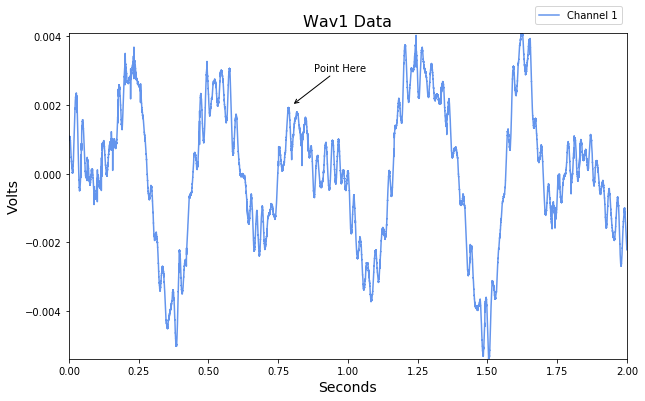

In [19]:
t = int(2 * data.streams.Wav1.fs) # int rounds it to the nearest integer

# declare the figure size
fig1 = plt.subplots(figsize=(10, 6))

channel = 1 

# plot the line using slices
plt.plot(Wav1_time[0:t], data.streams.Wav1.data[channel-1,0:t], color='cornflowerblue')

# Some matplotlib stuff
# add an annotation mark to the figure
plt.annotate('Point Here',
             xy=(0.8,0.002),
             xytext=(.88,.003),
             arrowprops=dict(arrowstyle='->', color='k')
            )

# create title, axis labels, and legend
plt.title('Wav1 Data', fontsize=16)
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Volts', fontsize=14)
plt.legend(('Channel {}'.format(channel),),
           loc='lower right', 
           bbox_to_anchor=(1.0,1.01)
          )
plt.autoscale(tight=True)
plt.show()

***Python Tip!**

Array slices in Python have some notable differences.
1. Zero-based indexing
2. Omit 'end' and just use a negative index to index starting from the end of the array
3. Omit the starting index if you want to include the first element

Matlab array slices
```
arr = 1:10;          % arr = [1 2 3 4 5 6 7 8 9 10]
b = arr(3:5);        % b = [3 4 5]
c = arr(1:end-2);    % c = [1 2 3 4 5 6 7 8]
d = arr(end-1:end);  % d = [9 10]
```

Python equivalent
```
arr = np.arange(1,11)  # arr = [1 2 3 4 5 6 7 8 9 10]
b = arr[2:5]           # b = [3 4 5]
c = arr[:-2]           # c = [1 2 3 4 5 6 7 8]
d = arr[-2:]           # d = [9 10]
```

For reference, here are some matplotlib colors originally from [this stackoverflow answer](https://stackoverflow.com/a/37232760)
![originally from https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib](https://i.stack.imgur.com/lFZum.png)


## Explore Epoc Events

Let's look at the contents of the epoc event structures.

In [20]:
print('all epoc events')
print(data.epocs)

all epoc events
Pu1e	[struct]
PC0_	[struct]


In [21]:
print(data.epocs.Pu1e)

name:	'Pu1e'
onset:	array([1.23739243e-04, 3.50011492e+00, 7.00010586e+00, 1.05000970e+01,
       1.40000880e+01, 1.75000789e+01, 2.10000701e+01, 2.45000610e+01,
       2.80000522e+01, 3.15000432e+01, 3.50000343e+01, 3.85000253e+01,
       4.20000162e+01, 4.55000074e+01, 4.89999983e+01, 5.24999895e+01,
       5.59999804e+01, 5.94999716e+01])
offset:	array([ 0.30011487,  3.80010581,  7.30009699, 10.80008793, 14.30007911,
       17.80007005, 21.30006123, 24.80005217, 28.30004311, 31.80003428,
       35.30002522, 38.8000164 , 42.30000734, 45.79999828, 49.29998946,
       52.7999804 , 56.29997158, 59.79996252])
type:	'onset'
type_str:	'epocs'
data:	array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])
dform:	4
size:	10


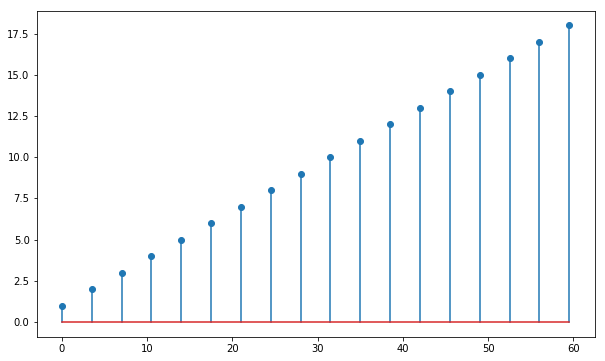

In [22]:
# a simple plot
fig1 = plt.subplots(figsize=(10, 6))
plt.stem(data.epocs.Pu1e.onset, data.epocs.Pu1e.data)
plt.show()